In [2]:
from data_retriever import DataRetriever
from pre_processing import PreProcessing
from scalers.min_max import MinMax
import matplotlib.pyplot as plt
import pywt
import copy

In [3]:
#Retrieving data from yahoo API
a = DataRetriever()
a.get_yahoo_stock_data()
dataset = a.get_stock_ds()

#Preprocessing yahoo data
pp = PreProcessing(dataset, MinMax)
train, test = pp.pre_process()

[*********************100%***********************]  7 of 7 completed


In [4]:
db1 = pywt.Wavelet('db4')

0       0.169218
1       0.170238
2       0.170238
3       0.164114
4       0.156969
          ...   
1925    0.857687
1926    0.857687
1927    0.856457
1928    0.858096
1929    0.846003
Name: ITUB3.SA_Close, Length: 1930, dtype: float64

In [72]:
coeffs = pywt.wavedec(train['ITUB3.SA_Close'], db1)

In [30]:
amplitude_envelope

array([0.00505093, 0.00853285, 0.01080313, ..., 0.00356089, 0.00561581,
       0.00917634])

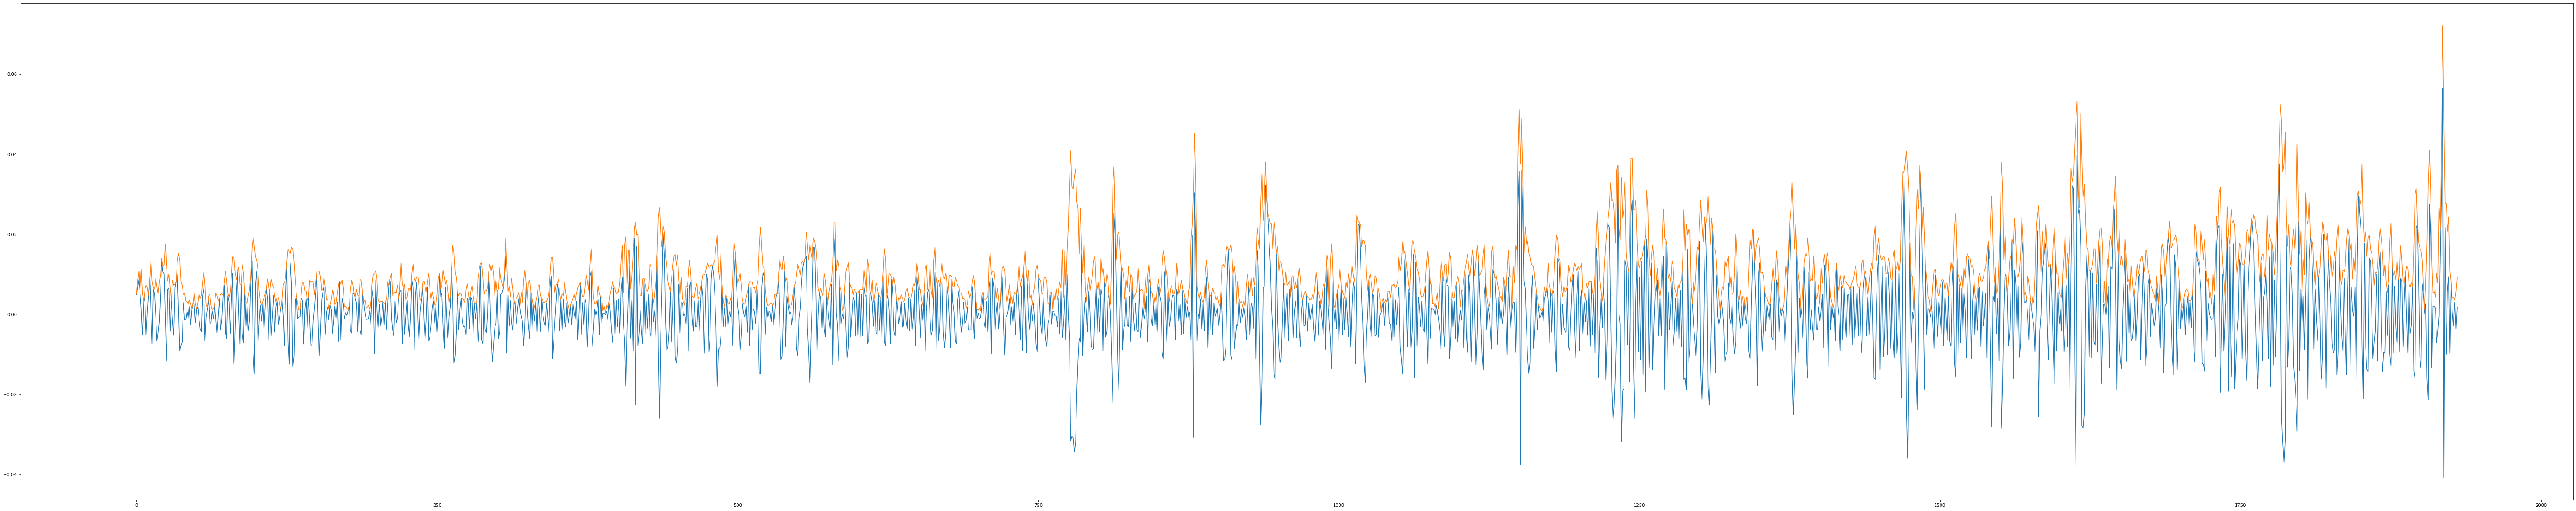

In [31]:
plt.figure(figsize=(100,20))
plt.plot(imf[:, 0])
plt.plot(amplitude_envelope)

plt.show()

In [87]:
train_ = train.copy()

In [88]:
count_imf = dict()

for col in train.columns.difference(['Date']):
    imf = emd.sift.sift(train[col])    
    count_imf[col] = len(imf[0])

    for f in range(len(imf[0])):
        train_[col + '_imf_' + str(f)] = imf[:, f]

        #Extracting analytical signal
        analytic_signal = hilbert(imf[:, f])

        #Extracting amplitude evelope
        amplitude_envelope = np.abs(analytic_signal)
        
        #Extracting instantaneous phase
        instantaneous_phase = np.unwrap(np.angle(analytic_signal))

        #Extracting instantaneous frequency
        instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * 20)
        #Replicating last frequency to match number of sample of original dataset
        instantaneous_frequency = np.append(instantaneous_frequency, instantaneous_frequency[len(instantaneous_frequency)-1])

        train_[col + '_imf_' + str(f) + '_freq'] = instantaneous_frequency



c:\Users\Usuario\Desktop\Mestrado\stock-market-chm\imp-virtual-env\lib\site-packages\emd\support.py:210: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  out_args[idx] = out_args[idx][:, np.newaxis]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_22472/2739672426.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train_[col + 'imf_' + str(f)] = imf[:, f]
C:\Users\Usuario\AppData\Local\Temp/ipykernel_22472/2739672426.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [90]:
train.shape

(1931, 85)

In [92]:
train_.shape

(1931, 1223)

In [93]:
train_

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,...,MSFT_Volumeimf_3,MSFT_Volumeimf_3_freq,MSFT_Volumeimf_4,MSFT_Volumeimf_4_freq,MSFT_Volumeimf_5,MSFT_Volumeimf_5_freq,MSFT_Volumeimf_6,MSFT_Volumeimf_6_freq,MSFT_Volumeimf_7,MSFT_Volumeimf_7_freq
0,2010-01-04,0.020713,0.018171,0.021880,0.021576,0.244034,0.033912,0.028221,0.030724,0.028159,...,0.074603,1.170096,-0.033948,0.933803,0.016555,0.333376,0.014368,0.207152,0.171040,0.495554
1,2010-01-05,0.021864,0.019242,0.022740,0.021940,0.302982,0.030758,0.026962,0.029229,0.029038,...,0.075675,0.055332,-0.033812,0.014307,0.016556,-0.000667,0.014400,0.001981,0.171043,0.000148
2,2010-01-06,0.021647,0.018888,0.020268,0.018590,0.275875,0.032067,0.026126,0.029049,0.026322,...,0.076609,0.622789,-0.033657,0.528829,0.016556,0.199075,0.014433,0.102732,0.171045,0.203108
3,2010-01-07,0.019061,0.015716,0.018587,0.018206,0.234989,0.029170,0.023440,0.025846,0.023816,...,0.077392,0.078058,-0.033485,0.020440,0.016557,-0.000933,0.014465,0.002280,0.171048,0.000165
4,2010-01-08,0.017634,0.015716,0.018597,0.019582,0.218903,0.027548,0.024956,0.026105,0.027736,...,0.078009,0.460857,-0.033293,0.404522,0.016557,0.160638,0.014498,0.074929,0.171050,0.132280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,2017-05-29,0.984678,0.981653,0.986667,0.981039,0.022782,0.994408,0.989044,0.992785,0.987808,...,0.000971,-0.084037,0.007002,-0.006976,-0.028549,0.002159,-0.013259,0.000828,0.085895,0.000157
1927,2017-05-30,0.980257,0.983100,0.986820,0.981496,0.018857,0.996097,0.991886,0.999831,0.988832,...,0.000200,-0.056175,0.007004,0.223093,-0.028544,0.287453,-0.013242,0.093982,0.085898,-0.185766
1928,2017-05-31,0.984450,0.981120,0.979540,0.974566,0.028283,1.000000,0.990682,0.984818,0.986516,...,-0.000472,-0.042037,0.006989,-0.002665,-0.028538,0.001545,-0.013225,0.000800,0.085900,0.000142
1929,2017-06-01,0.978352,0.974726,0.978314,0.977764,0.010742,0.998423,0.989423,0.995168,0.987997,...,-0.001051,0.022815,0.006958,0.294731,-0.028532,0.513515,-0.013208,0.190922,0.085903,-0.396101


In [36]:
instantaneous_frequency

array([-2.28459740e-01, -1.43308256e-04, -1.11991544e-01, ...,
        1.83358675e-01, -4.51461059e-05,  4.26628774e-01])

In [17]:

adfuller(ds['ITUB3.SA_Close'])[1]

0.8891301273557901

In [23]:
imf[:, 5]

array([-0.02999089, -0.03015495, -0.03031857, ...,  0.48538439,
        0.48623373,  0.48707408])

In [24]:
adfuller(imf[:, 6])[1]

0.39906052976012363

In [25]:
IP, IF, IA = emd.spectra.frequency_transform(imf[:, 0], sample_rate, 'hilbert')

In [28]:
import matplotlib.pyplot as plt

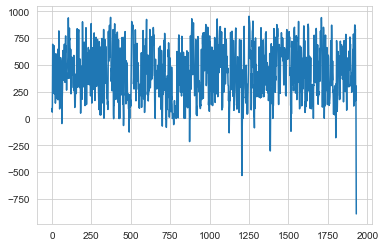

In [32]:
plt.plot(range(len(IF)), IF)


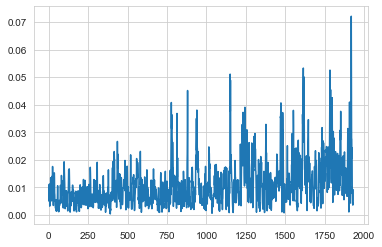

In [33]:
plt.plot(range(len(IA)), IA)

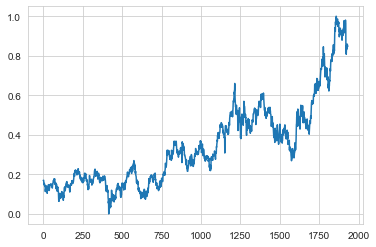

In [31]:
plt.plot(range(len(IF)), ds['ITUB3.SA_Close'])

In [34]:
freq_edges, freq_bins = emd.spectra.define_hist_bins(0, 10, 100)
hht = emd.spectra.hilberthuang(IF, IA, freq_edges)

In [85]:
len(time_vect)

1931

C:\Users\Usuario\AppData\Local\Temp/ipykernel_23068/4215439459.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time_vect, freq_bins, hht, cmap='ocean_r')


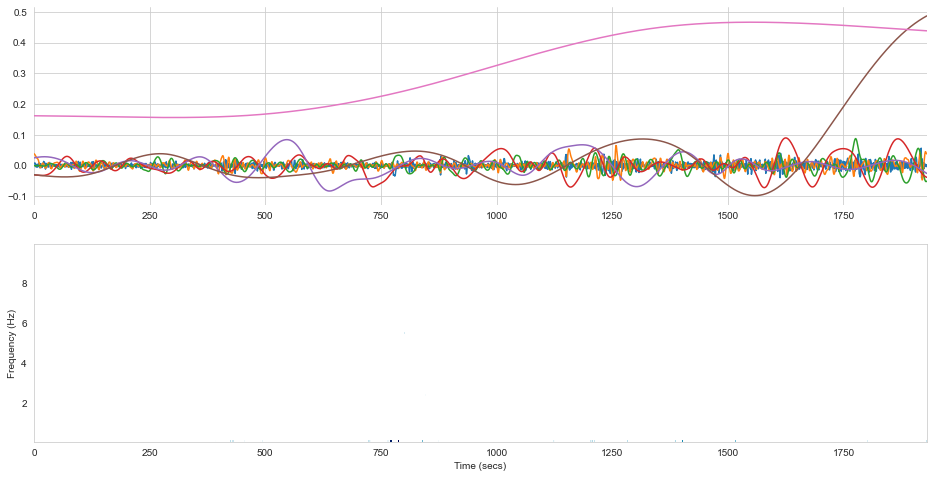

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(211, frameon=False)

for i in range(len(imf[0])):
    plt.plot(time_vect, imf[:, i])
plt.xlim(time_vect[0], time_vect[-1])
plt.grid(True)

plt.subplot(212)
plt.pcolormesh(time_vect, freq_bins, hht, cmap='ocean_r')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (secs)')
plt.grid(True)
plt.show()

In [40]:
hht[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.15378472e-05, 8.42043050e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [88]:
import emd
import numpy as np
from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define and simulate a simple signal
peak_freq = 12
sample_rate = 512
seconds = 10
noise_std = .5
x = emd.utils.ar_simulate(peak_freq, sample_rate, seconds, noise_std=noise_std, random_seed=42, r=.99)[:, 0]
x = x*1e-4
t = np.linspace(0, seconds, seconds*sample_rate)

In [91]:
imf = emd.sift.mask_sift(x, max_imfs=5)

In [92]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht')

In [97]:
len(IF[:,0])

5120

In [98]:
sample_rate

512